In [1]:
import numpy as np
from numpy import linalg as la
import sympy as sy
import matplotlib.pyplot as plt
from scipy import optimize as op
np.set_printoptions(suppress=True)

## Problem 1

### a)

In [2]:
#mass and mu values
m_sun = 1.989e30
m_Jupiter = 1.898e27
mu_js = m_Jupiter / (m_sun + m_Jupiter)

In [19]:
#set up functions to use newton's method to solve for y=0 lagrange points
def solve_L1(mu):
    x_curr = 0.8
    err = 1
    tol = 1e-15
    while (abs(err) > tol):
        err = x_curr - (1 - mu) / (mu + x_curr)**2 + mu / (x_curr - 1 + mu)**2
        dL1dx = 1 + 2 * (1 - mu) / (mu + x_curr)**3 - 2 * mu / (x_curr - 1 + mu)**3
        x_next = x_curr - err / dL1dx
        x_curr = x_next
    return x_curr

def solve_L2(mu):
    x_curr = 1
    err = 1
    tol = 1e-15
    while (abs(err) > tol):
        err = x_curr - (1 - mu) / (mu + x_curr)**2 - mu / (x_curr - 1 + mu)**2
        dL2dx = 1 + 2 * (1 - mu) / (mu + x_curr)**3 + 2 * mu / (x_curr - 1 + mu)**3
        x_next = x_curr - err / dL2dx
        x_curr = x_next
    return x_curr

def solve_L3(mu):
    x_curr = 1
    err = 1
    tol = 1e-10
    while (abs(err) > tol):
        err = x_curr + (1 - mu) / (mu + x_curr)**2 + mu / (x_curr - 1 + mu)**2
        dL3dx = 1 - 2 * (1 - mu) / (mu + x_curr)**3 - 2 * mu / (x_curr - 1 + mu)**3
        x_next = x_curr - err / dL3dx
        x_curr = x_next
    return x_curr

In [4]:
#test case
m_E = 5.972e24
mu_ES = m_E / (m_sun + m_E)
solve_L1(mu_ES)

0.9900276710713891

In [5]:
#P1.1
solve_L1(mu_js)

0.9323783368654114

In [6]:
#P1.2
solve_L2(mu_js)

1.0688176812557593

In [7]:
#P1.3
solve_L3(mu_js)

-1.0003972243879533

In [8]:
#P1.4, P1.5
#x-coord of L4 L5
0.5 - mu_js

0.49904666135583037

In [9]:
#P1.4, P1.5
np.sqrt(3)/2

0.8660254037844386

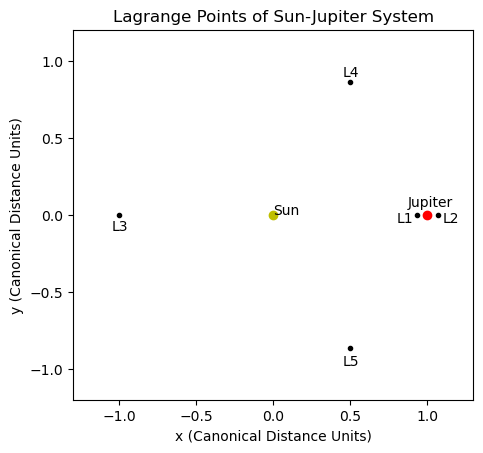

In [10]:
#P1.6, create plot w/ labels
fig, ax = plt.subplots()
plt.title("Lagrange Points of Sun-Jupiter System")
plt.xlim(-1.3, 1.3)
plt.xlabel('x (Canonical Distance Units)')
plt.ylabel('y (Canonical Distance Units)')
plt.ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.plot(0,0, 'yo')
ax.annotate('Sun', (0,0))
plt.plot(1,0, 'ro')
ax.annotate('Jupiter', (0.87,0.05))
plt.plot(0.932378336865411,0, 'k.')
ax.annotate('L1', (0.80,-0.05))
plt.plot(1.06881768125576,0, 'k.')
ax.annotate('L2', (1.1,-0.05))
plt.plot(-1.00039722438795,0, 'k.')
ax.annotate('L3', (-1.05,-0.1))
plt.plot(0.49904666135583037,0.8660254037844386, 'k.')
ax.annotate('L4', (0.45,0.9))
plt.plot(0.49904666135583037,-0.8660254037844386, 'k.')
ax.annotate('L5', (0.45,-0.98))
plt.show()


In [11]:
fig.savefig('jupiter_sun_lagrange_points.png', facecolor='white', transparent=False)

### b)

In [20]:
#more constants for Europa problem: mass, distance, mu
m_Europa = 4.799e22 #kg
mu_ej = m_Europa / ( m_Jupiter + m_Europa ) #mu for Europa and Jupiter System
d_ej = 670e3 #km

In [21]:
#P1.7
solve_L1(mu_ej)

0.9797631229509058

In [22]:
#P1.8
solve_L2(mu_ej)

1.0204623871289948

In [24]:
#Europa is at 1 CDU from Jupiter, we need to calculate magnitude of distance from Europa in CDU, then convert to km
d_L1 = (1 - mu_ej - 0.979763122950906) * d_ej
d_L2 = (1.02046238712899 - 1) * d_ej
print(d_L1, d_L2)

13541.767429510475 13709.79937642327


### c)

In [16]:
#constants for Apophis problem
m_Apophis = 2.699e10 #kg
mu_as = m_Apophis / ( m_sun + m_Apophis ) #mu for Europa and Jupiter System
d_as = 149e6 #km

In [17]:
#P1.9
solve_L1(mu_as)

0.9999998346202777

In [18]:
#Apophis is at 1 CDU from the Sun, we need to calculate magnitude of distance from Apophis in CDU, then convert to km
d_L1 = (1 - 0.9999998346202777) * d_as
print(d_L1)

24.64157861525873


## Problem 2

In [47]:
#use canonical units to make calculations easier. define each CU here, along with mu
AU = 1.496e+8 #km
TU = (365.256 * 24 * 60 * 60) / (2 * np.pi) #s, time taken to sweep out one radian
t_f = (410 * 24 * 60 * 60) / TU #TU, time of flight covnerted from days to seconds to TU
mu = 1

In [48]:
#radius and velocity vectors from JPL Horizons, converted to CU
r_E = np.array([ -1.152298994309664E+08, -9.900155838813813E+07, 3.696167672807723E+04 ]) / AU #radius in km converted to AU
r_Apophis = np.array([ -7.850925799584286E+07, 1.374546686621155E+08, -9.195926177911177E+06 ]) / AU
v_E = np.array([1.897300201461335E+01, -2.268665080580648E+01, 5.966729305662000E-04]) * TU / AU
v_Apopohis = np.array([-2.455504320996803E+01, -1.023862607480736E+01, -3.504079061601750E-02]) * TU / AU

In [49]:
#calculate chord vector, vector from Earth at start to Apophis at end, and the magnitude
#P2.3
c = r_Apophis - r_E
c_mag = la.norm(c)

In [50]:
#P2.1, P2.2, P2.3
print(la.norm(r_E), la.norm(r_Apophis), la.norm(c))

1.0154981928761537 1.059909510213292 1.60072577742366


In [51]:
#P2.4, calcualte semiperimeter
s = (la.norm(r_E) + la.norm(r_Apophis) + la.norm(c)) / 2 #semiperimeter

In [52]:
print(s)

1.838066740256553


In [53]:
#P2.5, calcuate minimum semimajor axis for an elliptic transfer
a_min = s / 2

In [54]:
print(a_min)

0.9190333701282765


In [55]:
#P2.6, calculate theta. we need to use 2 * np.pi - (calulated theta) to get a prograde transfer
theta = 2 * np.pi - np.arccos(np.dot(r_E, r_Apophis) / (la.norm(r_E) * la.norm(r_Apophis)))

In [56]:
print(theta)

4.521855853377742


In [57]:
#P2.7, calculate beta at this minimum semimajor axis, then the time required to complete this orbit
beta_m = 2 * np.arcsin(np.sqrt(1 - la.norm(c)/s))
t_m = np.sqrt( (a_min**3) / mu ) * ( np.pi - beta_m + np.sin(beta_m))

In [58]:
print(t_m, (t_m < t_f), t_f)

2.7110989712371283 True 7.05287791560886


In [59]:
#function that returns the equation that needs to be solved numerically
#theta > pi and tf > tm, so alpha = 2pi - alpha_0 and beta = -beta_0
def lambert(a):
    alpha = 2 * np.pi - 2 * np.arcsin( np.sqrt( s / (2 * a) ) )
    beta = -2 * np.arcsin( np.sqrt( ( s - c_mag ) / ( 2 * a ) ) )
    return -t_f + np.sqrt(a**3 / mu) * (alpha - np.sin(alpha) - (beta - np.sin(beta)))

In [60]:
#P2.8, solve for the a that fits our time using fsolve
a = op.fsolve(lambert, 1.1)[0]
print(a)

1.237801376793634


In [61]:
#P2.9, P2.10, P2.11 calculate unit vectors in the direction of Earth at start, Apophis at end, chord at beginning
u_1 = r_E / la.norm(r_E)
u_2 = r_Apophis / la.norm(r_Apophis)
u_c = c / c_mag

In [62]:
print(u_1, u_2, u_c)

[-0.75849799 -0.65167533  0.0002433 ] [-0.49513142  0.86688026 -0.05799561] [ 0.15334221  0.98742069 -0.03855574]


In [63]:
#P2.12, P2.13 calculate the alpha and beta at our solution semimajor axis
alpha = 2 * np.pi - 2 * np.arcsin( np.sqrt( s / (2 * a) ) )
beta = -2 * np.arcsin( np.sqrt( ( s - c_mag ) / ( 2 * a ) ) )
print(alpha, beta)

4.206088911713054 -0.6296120271238741


In [64]:
np.sqrt(a**3 / mu) * (alpha - beta - np.sin(alpha) + np.sin(beta))

7.052877915608858

In [65]:
#P2.14, P2.15 calculate A and B parameters for velocity vectors
A = np.sqrt( mu / (4 * a) ) / np.tan(alpha / 2)
B = np.sqrt( mu / (4 * a) ) / np.tan(beta / 2)
print(A, B)

-0.2646770262410441 -1.3801097186939844


In [66]:
#P2.16 calculate velocity vector right after first burn in transfer
v1 = (B + A) * u_c + (B - A) * u_1
print(v1)

[ 0.59383822 -0.89719649  0.06314458]


In [69]:
#P2.17, P2.18 find the difference between Earth's velocity and the velocity needed to start the transfer
delta_v = la.norm(v1 - v_E) * AU / TU
print(delta_v, v_E)

4.634741544117753 [ 0.63699451 -0.76167557  0.00002003]


In [115]:
#check again that we are in prograde
np.cross(r_E, v1)

array([-0.04156584,  0.04878405,  1.08405595])

## Problem 3

In [116]:
#radii and mu for the Hohmann transfer
r_1 = AU
r_2 = 695700.0 #km
mu_sun = 1.327e11 #km^3 / s^2

In [117]:
#P3.1 calculate semimajor axis of the Hohmann transfer orbit
a_H = (r_1 + r_2) / 2
print(a_H)

75147850.0


In [118]:
#P3.2 calculate velocity of the Earth on its circular orbit around the sun
v_E = np.sqrt(mu_sun / r_1)
print(v_E)

29.783083882658914


In [119]:
#P3.3 calculate the velocity at the start of the transfer orbit (apoapse)
v_1 = np.sqrt( mu_sun * ( ( 2 / r_1 ) - ( 1 / a_H ) ) )
print(v_1)

2.865644987030405


In [245]:
#P3.4 calculate the velocity at the end of the transfer orbit (periapse)
v_2 = np.sqrt( mu_sun * ( ( 2 / r_2 ) - ( 1 / a_H ) ) )
print(v_2)

616.2145897078489


In [246]:
#P3.5 calculate delta v to leave earth using most basic Hohmann transfer method
print(v_E - v_1)

26.91743889562851


In [249]:
#P3.6 calculate the time the Hohmann transfer will take, then convert to days
t_H = (np.pi * np.sqrt(a_H**3 / mu_sun)) / 84000
print(t_H)

66.88210986751709


In [251]:
#P3.8 use Earth radius and mu to calculate the velocity of a probe in a 300 km altitude circular parking orbit 
r_circE = 6378 + 300 #radius of earth plus altitude
mu_E = 398600 #km^3 / m^2
v_circE = np.sqrt( mu_E / r_circE)
print(v_circE)

7.725835197559566


In [252]:
#P3.7 calculate v_inf: the hyperbolic excess velocity relative to earth, this is the same as deltav from a basic Hohmann transfer
#P3.9 then use this to calculate the periapse velocity of the probe at the periapse, which would be on the transfer orbit
v_inf = v_E - v_1
v_hp = np.sqrt( (2 * mu_E / r_circE) + v_inf**2 )
print(v_hp)

29.050397169395037


In [253]:
#P3.10 calculate the delta v for going from a circular orbit to a hyperbolic orbit that would result in a Hohmann transfer to the sun
delta_v = v_hp - v_circE
print(delta_v)

21.32456197183547
